# Example

Some example here

In [1]:
import zern.zern_core as zern
import numpy as np
from numpy.random import RandomState
import logging
import matplotlib.pyplot as plt
plt.rc('font', family='sans-serif')

In [2]:
# Parameters
N = 1024
N_zern = 50
rho_max = 1.0
randgen = RandomState(12345)  # random seed

In [3]:
# [0] Construct the coordinates and the aperture mask - simple circ
x = np.linspace(-rho_max, rho_max, N)
xx, yy = np.meshgrid(x, x)
rho = np.sqrt(xx ** 2 + yy ** 2)
theta = np.arctan2(xx, yy)
aperture_mask = rho <= rho_max
rho, theta = rho[aperture_mask], theta[aperture_mask]

INFO: Creating ZernikeNaive instance
DEBUG: Calculating the Zernike polynomials for a set coefficients of shape N=10
DEBUG: Going up to Radial Order n=3 | Total: 10 Zernike polynomials
DEBUG: Shape of the coefficients array is the same as total 10 of polynomials. No changes


n=0, m=0
n=1, m=-1
n=1, m=1
n=2, m=-2
n=2, m=0
n=2, m=2
n=3, m=-3
n=3, m=-1
n=3, m=1
n=3, m=3

 Mode: Standard
Total time required to evaluate 10 Zernike polynomials = 0.470 sec
Average time per polynomials: 47.005 ms


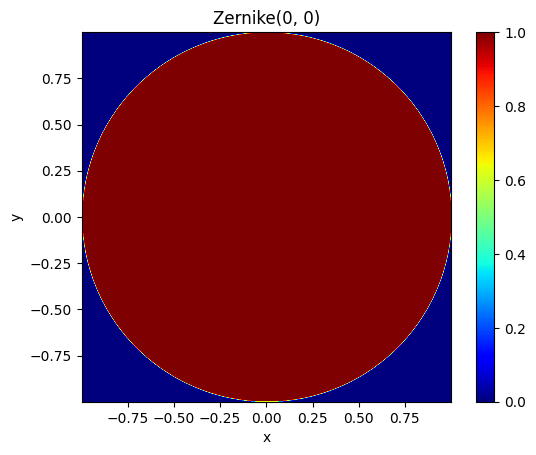

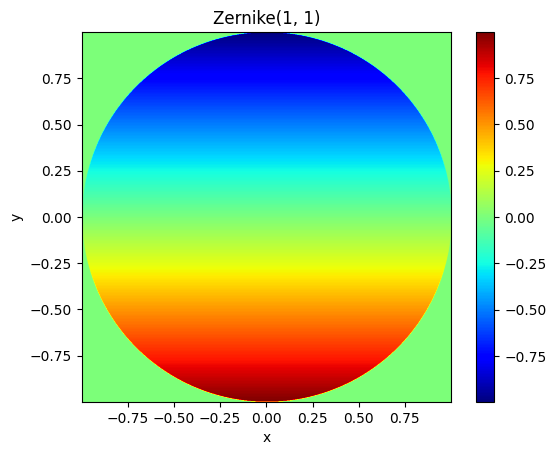

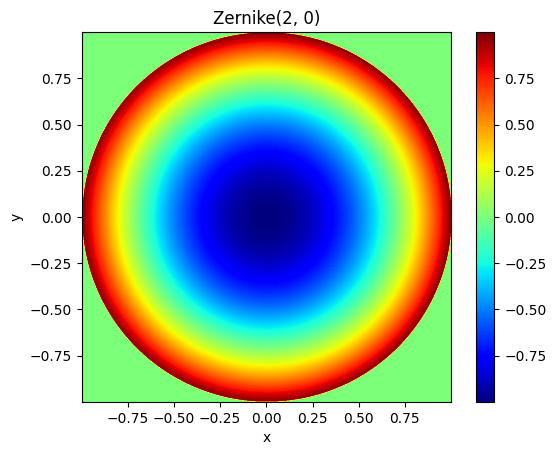

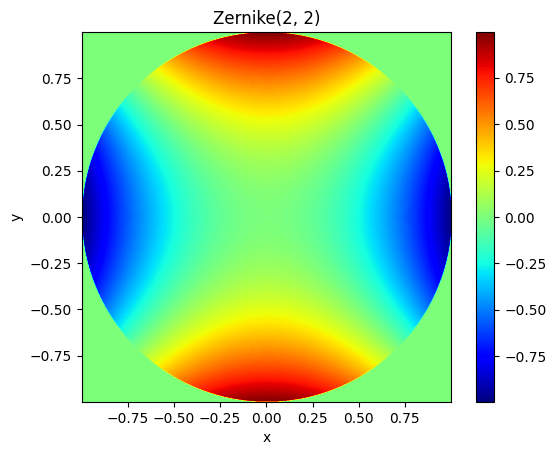

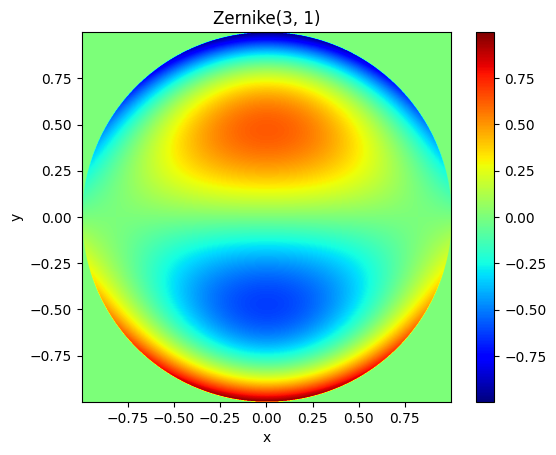

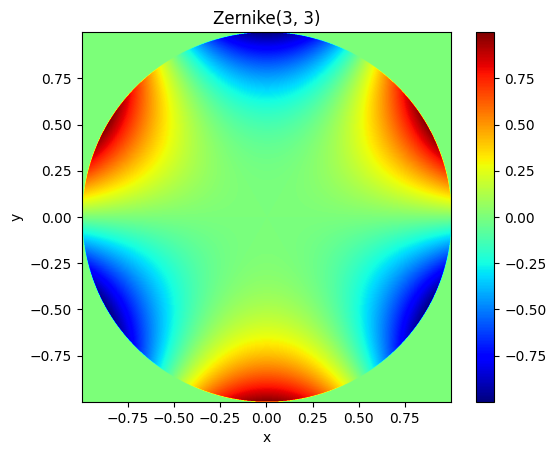

In [4]:
z = zern.ZernikeNaive(mask=aperture_mask, log_level=logging.DEBUG)
coef = randgen.normal(size=10)      # Coefficients of the Zernike Series expansion
result = z(coef=coef, rho=rho, theta=theta, normalize_noll=False, mode='Standard', print_option='All')

In [5]:
    # Show a speed comparison of Naive and Jacobi modes
    coef = randgen.normal(size=N_zern)
    z(coef=coef, rho=rho, theta=theta, normalize_noll=False, mode='Standard', print_option=None)
    times_naive = z.times
    z(coef=coef, rho=rho, theta=theta, normalize_noll=False, mode='Jacobi', print_option=None)
    times_jacobi = z.times
    z(coef=coef, rho=rho, theta=theta, normalize_noll=False, mode='ChongKintner', print_option=None)
    times_chong = z.times

DEBUG: Calculating the Zernike polynomials for a set coefficients of shape N=50
DEBUG: Going up to Radial Order n=9 | Total: 55 Zernike polynomials
DEBUG: Zero-padding the rest of the coefficients array
DEBUG: Checking if the model matrix H already exists? YES


IndexError: index 10 is out of bounds for axis 1 with size 10